Project author: Agnieszka Trzeciak

Data source: https://www.kaggle.com/datasets/sadiqshah/bike-sales-in-europe

In [1]:
#Importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
matplotlib.rcParams['figure.figsize'] = (10,6)

%matplotlib inline

In [2]:
#df = pd.read_csv(r'PATH.csv')
df = df.drop(['Day','Month','Year','Age_Group','Profit','Cost','Revenue'],axis=1)
df = df.sort_values(by='Date')
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.head()

,Date,Customer_Age,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price
60993,2011-01-01,42,M,United States,California,Bikes,Road Bikes,"Road-750 Black, 44",1,344,540
58729,2011-01-01,33,F,France,Yveline,Bikes,Road Bikes,"Road-150 Red, 48",2,2171,3578
58913,2011-01-01,17,M,Canada,British Columbia,Bikes,Road Bikes,"Road-250 Red, 44",1,1519,2443
63711,2011-01-01,39,M,United States,Washington,Bikes,Road Bikes,"Road-550-W Yellow, 38",3,713,1120
49787,2011-01-01,23,M,Australia,Victoria,Bikes,Mountain Bikes,"Mountain-200 Black, 46",1,1252,2295


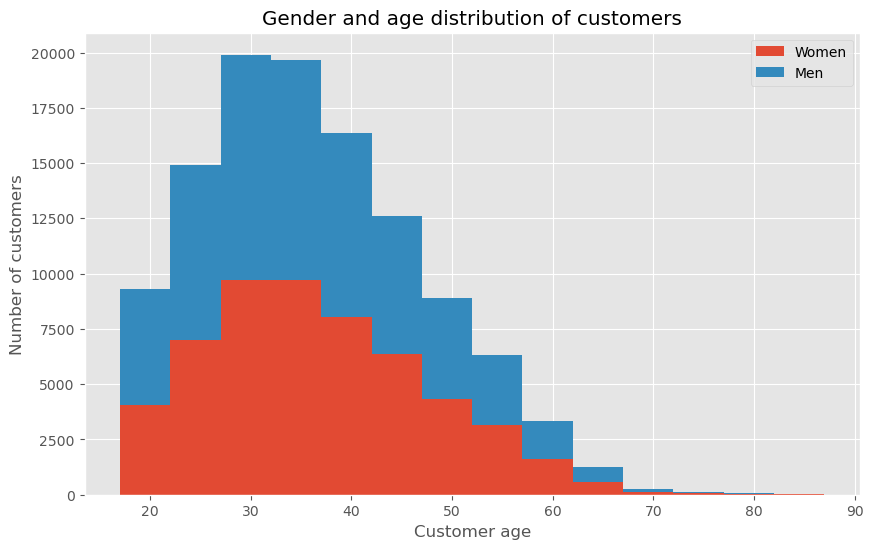

In [3]:
#Basic demographic information
n_bins = int((df['Customer_Age'].max()-df['Customer_Age'].min())/5) #finding a good number of bins for histogram

plt.hist(pd.DataFrame({'Women': df.groupby('Customer_Gender').get_group('F')['Customer_Age'],
                        'Men':   df.groupby('Customer_Gender').get_group('M')['Customer_Age']}),
                         bins=n_bins, histtype='bar',stacked=True,label=['Women','Men'])
plt.legend()
plt.xlabel('Customer age')
plt.ylabel('Number of customers')
plt.title('Gender and age distribution of customers')
plt.show()

We can notice, that women make up about half of the customers within every age bracket.

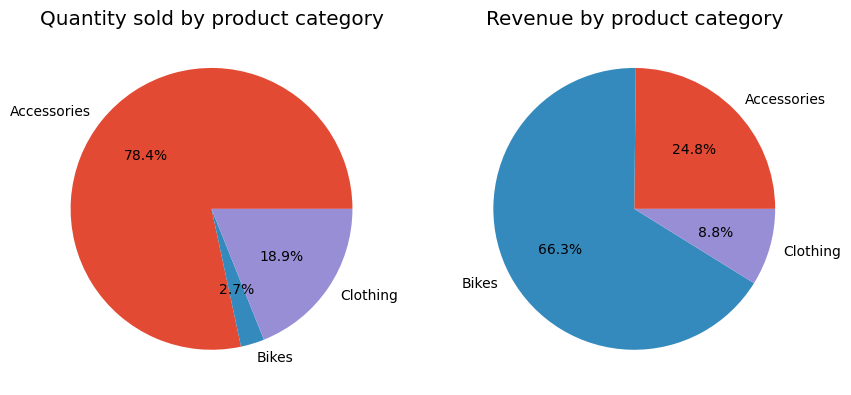

In [4]:
# Finding the most important product category
df['Revenue'] = df['Order_Quantity'] * (df['Unit_Price'] - df['Unit_Cost']) #adding a column for revenue from a sale
labels = list(df.groupby('Product_Category')['Revenue'].sum().index) 

plt.subplot(1,2,1) #Plot for quantity sold
plt.pie(df.groupby('Product_Category')['Order_Quantity'].sum(),autopct='%1.1f%%',labels=labels)
plt.title('Quantity sold by product category')

plt.subplot(1,2,2) #Plot of revenue from selling
plt.pie(df.groupby('Product_Category')['Revenue'].sum(),autopct='%1.1f%%',labels=labels)
plt.title('Revenue by product category')

plt.show()

While accessories make up the majority of items sold, it is bikes, that contribute nearly two-thirds of company revenue. We can look closer at what kind of bikes are most profitable for us.

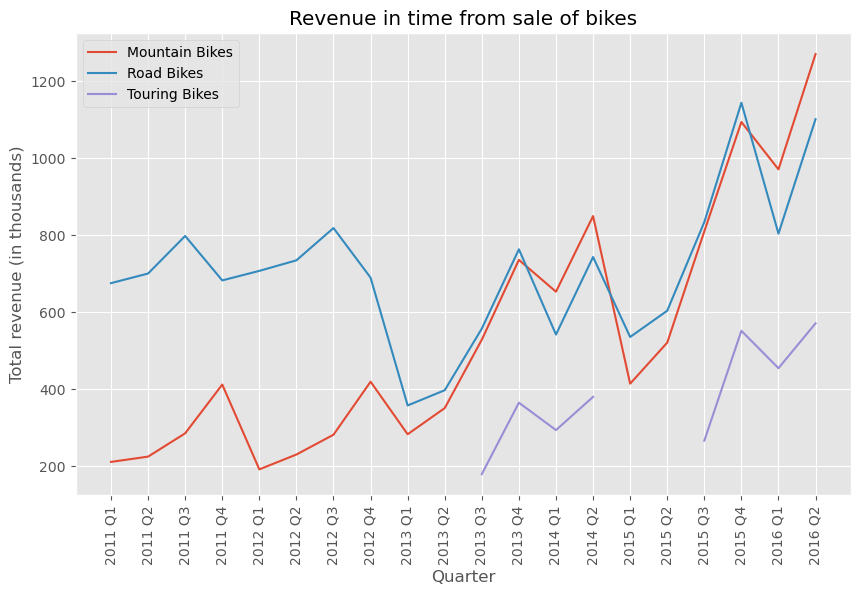

In [5]:
df['Simple_Date'] = df['Date'].apply(lambda x: str(x.year)+' Q'+str(x.quarter)) #adding column for year+quarter 

#line plots for revenues of different bikes over time
plt.plot(df[df['Product_Category']=='Bikes'].groupby(['Simple_Date','Sub_Category'])['Revenue'].sum().unstack()/1000,
         label=df[df['Product_Category']=='Bikes'].groupby(['Simple_Date','Sub_Category'])['Revenue'].sum().unstack().columns)
plt.xticks(rotation=90)
plt.title('Revenue in time from sale of bikes')
plt.ticklabel_format(axis='y',style='plain')
plt.ylabel('Total revenue (in thousands)')
plt.xlabel('Quarter')
plt.legend()
plt.show()

Finally let's see what countries contribute most to our profits.

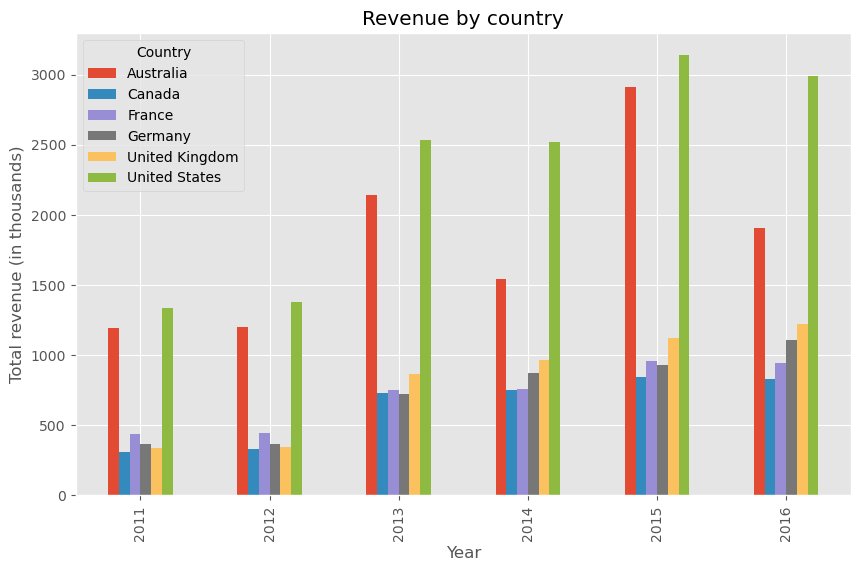

In [6]:
df['Year'] = df['Date'].dt.year
(df.groupby(by = ['Year','Country'])['Revenue'].sum().unstack()/1000).plot.bar()
plt.title('Revenue by country')
plt.xlabel('Year')
plt.ylabel('Total revenue (in thousands)')
plt.show()